<a href="https://colab.research.google.com/github/InutilemMachina/DataSciRepo/blob/main/StepwiseRegression_v0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stepwise Regression

## Setup, import

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = 2*2.54, 2/1.618*2.54
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.sans-serif'] = 'Times'
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['font.size'] = 10
mpl.rcParams['lines.linewidth'] = 1
mpl.rcParams['legend.loc'] = 'upper right'
mpl.rcParams['legend.fancybox'] = False

# mpl.rcParams['axes.xmargin'] = 0.05  # x margin.  See `axes.Axes.margins`
# mpl.rcParams['axes.ymargin'] = 0.05  # y margin.  See `axes.Axes.margins`
# mpl.rcParams['axes.zmargin'] = 0.2  # z margin.  See `axes.Axes.margins`

mpl.rcParams['axes3d.xaxis.panecolor'] = (1, 1, 1, 0)  # white, and not opaque
mpl.rcParams['axes3d.yaxis.panecolor'] = (1, 1, 1, 0)
mpl.rcParams['axes3d.zaxis.panecolor'] = (1, 1, 1, 0)

def plotlabels(ax,title,xlabel,ylabel):
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.grid(True)
    ax.autoscale(enable=True, axis='both', tight=True)

"""
plt.plot([1,2,3,4], label = 'label')
plt.legend()
plotlabels(plt.gca(),'Title',r'$X_l$',r'$Y_l$')
"""

"\nplt.plot([1,2,3,4], label = 'label')\nplt.legend()\nplotlabels(plt.gca(),'Title',r'$X_l$',r'$Y_l$')\n"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
!pip install summarytools
from summarytools import dfSummary
import numpy as np

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978.

Used in Belsley, Kuh & Welsch, 'Regression diagnostics ...', Wiley, 1980.

N.B. Various transformations are used in the table on pages 244-261 of the latter.

Variables in order:
* CRIM     - per capita crime rate by town
* ZN       - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS    - proportion of non-retail business acres per town
* CHAS     - Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* NOX      - nitric oxides concentration (parts per 10 million)
* RM       - average number of rooms per dwelling
* AGE      - proportion of owner-occupied units built prior to 1940
* DIS      - weighted distances to five Boston employment centres
* RAD      - index of accessibility to radial highways
* TAX      - full-value property-tax rate per USD 10,000
* PTRATIO  - pupil-teacher ratio by town
* B        - $1000(Bk - 0.63)^2$ where Bk is the proportion of blacks by town
* LSTAT    - % lower status of the population
* MEDV     - Median value of owner-occupied homes in USD 1000's


In [ ]:
boston_url = '/content/drive/MyDrive/Colab Notebooks/DataSciRepo/BostonHousing.csv'
boston = pd.read_csv(boston_url)  # , encoding='ISO-8859-1', error_bad_lines=False, skiprows= [range(25)], delimiter=' '
# boston

## Data cleaning

In [ ]:
# boston.plot()

In [ ]:
dfSummary(boston)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,crim[float64],Mean (sd) : 3.6 (8.6)min < med < max:0.0 < 0.3 < 89.0IQR (CV) : 3.6 (0.4),504 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACBUlEQVR4nO3XwW7aQBRG4TuF0AEqG0RrdmzZdcGSh+jD5iG85T2QDLKFY8cITXfdVC2xHSv5k/Otmcssjsa6LoRgwHv35a0vALzE+N4PnHNTM5t0nN+EEKqOZ4E//huqc266Wq1+RVG07DK8KIqzc+6RWNHXvRd1EkXRcr/fV3Ec120G53nu0zRdZlk2MTNCRS93P/1mZnEc10mSPHWYP+1wBvgLyxQkECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokjIccfrvdHswscs51HdGEEKpXvBJEDRZqWZYP1+v152azGY1Go7rLjKIozs65R2LFYKE2TTP23s92u129Xq/Pbc/nee7TNF1mWTYxM0L95Ab99JuZzefzOkmSp47Hp696GchimYKEwV/UPnouYyxiH8i7DbXvMsYi9rG8KNQ8z33bwZfLxZuZlWXpj8fjrO350+n0zXs/2263brFYPLc5W1XV18Ph8CPLsu/OuaLtf+NNPIcQ/vkg/QZ/9H9FrqlyrQAAAABJRU5ErkJggg=="">",0(0.0%)
2,zn[float64],Mean (sd) : 11.4 (23.3)min < med < max:0.0 < 0.0 < 100.0IQR (CV) : 12.5 (0.5),26 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACtklEQVR4nO3YP2/aQBjH8ef4V5O65yAqsrF0yFCpQ0YvfQd9sVm7dSBSt2Rnj6KQYATBxXLcKVWlSiE+B8Ev/X5mnuNkvtjyuaqqDDh0rX1vAHiJzrYPOOf6ZtYLXH9TVdU6cBb449lQnXP94XD4zXs/CFl8sVjcO+fOiRVNbbuj9rz3gzRN10mS5HUWzrIsmkwmg9ls1jMzQkUjWx/9ZmZJkuSj0eghYP1+wAzwD16mIIFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIaGz7w08xznXN7Ne4Pimqqr1a+4H+3OwoTrn+sPh8Jv3fhAyv1gs7p1z58T6NhxsqGbW894P0jRdJ0mS1xnMsiyaTCaD2WzWMzNCfQMOOVQzM0uSJB+NRg8Bo/1X3wz2hpcpSCBUSDj4R3+osiy7Zuadc6FL/HenBg1PWcx2eM12GmrDWPzj42M3ZHC1WnWLovgyHo/b7Xa71ovYk/l8vnTOfTezkHm5yJuespjt9prtLNSmsRRFEZVl+TnP8x9mVutlarPZdKIoOjo7O8tPTk7u63739fX1h4uLi6/j8fhjyN4b/mAtM3sMmGs67+M4HqVpuqh7ymLW/JptO058UahZlkV1v/ju7i6Ooujo9PTUHR8f/6o7f3t7G02n06Msy97f3Nxs6swul8va+/1bURSd0L3P5/P48vIy6Acry7K7Wq0+xXE8bbVaRb1dN5t/ujEURfHTAv5gTa7Zer1+d3V19exx4m+QwfBRWCqPkwAAAABJRU5ErkJggg=="">",0(0.0%)
3,indus[float64],Mean (sd) : 11.1 (6.9)min < med < max:0.5 < 9.7 < 27.7IQR (CV) : 12.9 (1.6),76 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAC1klEQVR4nO3dsW7aQBjA8e8KgQsgG4REtqwMlTpk5CH6sH2EDDxBViY2FEBGoaGAoVMqVQ0B39nNfcf/tx+xdH9ZtnNnm+PxKEDovnz2AQCXqH/2AeBvxphbEWl4/MT2eDy+lnU8oSDUgBhjbvv9/vckSXquv7FarZbGmB+xxUqoYWkkSdIbjUavaZpuig7OssyOx+PefD5viAiholppmm4Gg8FPx+G3pR5MILiZggqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoEPTqKc9FxFEuIL5WwYbqu4g41gXE16rSUD3PiEmn0xmMRqNV0UXEMS8gvlaVhep7RtztdjbP86/NZvPRcRFxlAuIr1WVZ1SvbRXT6bT39PTU2u/3tSoODrpUfo3quq1iuVxyRsQfPJ6CCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUKFswunPfY9JYfD4cZhHPCPD0P12ff0tudps9k8iojrhxMAETl/RnXe98SeJ5Tpoj1TLvue2POEMnEzBRWCfVMK3OR5fiMiiTHGZXiwr0GKNlTPCRMJeNJOWa/XN7vd7tv9/X2tVqsVfpdCyK9BijJU3wkTCXvSTtlut3Vrbevh4WFzd3e3LDI29NcgRRmqz4SJhD9p57TbbddvqQZ7AxxlqG88Jkwk4Em7Rtz1QwVChQqEChUIFSoQKlQgVKhAqFCBUKFC1A/8fcS6uEMrQn1HzIs7tCLUd8S8uEMrQv1AjIs7tCJUlKbKb9cSKkpR9bdrCRVlcd6xfMl1PaGiVK5fapQz1/WEWgGPZ7C8XeYEQi2ZzzNY3i5z2kWhZllmi/7wy8uLFRFZr9d2Npu1/uf4z/zbi8WiY61tDYdD0+12fxUZ+/z8bCeTSSvLsvZsNtsWGSvid9xZltk8z+vi/t+45HA41F1auWTMbx/bcEmt0Jy1AAAAAElFTkSuQmCC"">",0(0.0%)
4,chas[int64],1. 02. 1,471 (93.1%)35 (6.9%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABOklEQVR4nO3bMWrDQBRF0T9BmLiZQQ

Text(0.5, 0.98, 'Individual value plots')

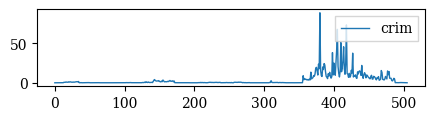

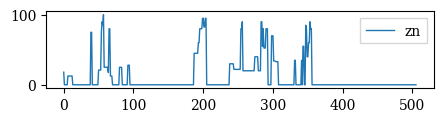

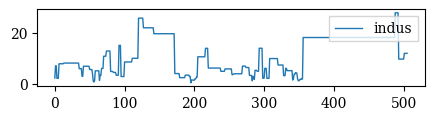

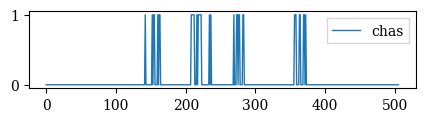

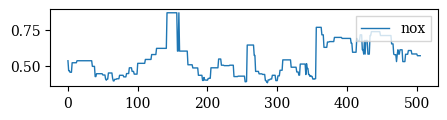

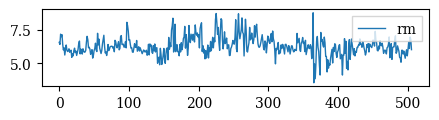

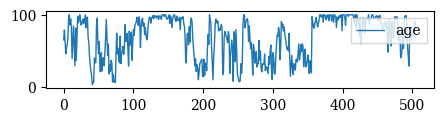

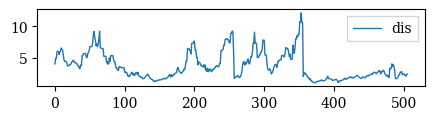

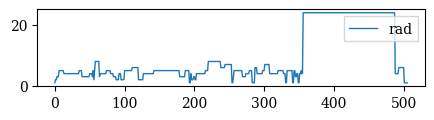

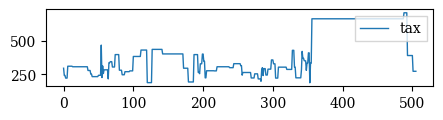

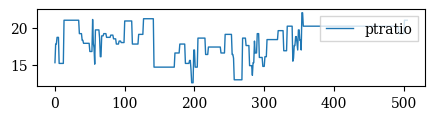

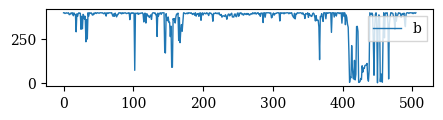

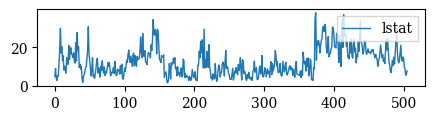

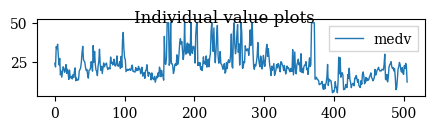

In [ ]:
for i in boston.columns:
    fig, ax = plt.subplots(1,1,figsize = (5,1))
    ax.plot(boston[i], label = i)
    ax.legend()
fig.suptitle('Individual value plots')

medv seem capped at 50, which is problematicm since its a target variable. Thus we delete those and corresponding values from the dataframe

Text(0.5, 0.98, 'Target var. "medv" capped and cropped')

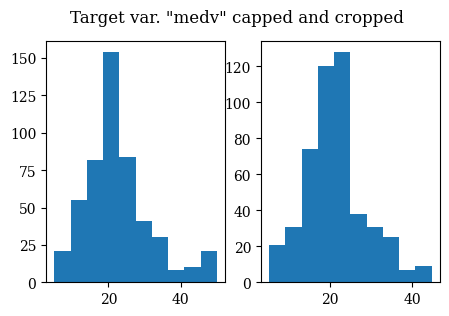

In [ ]:
fig,ax = plt.subplots(1,2)
ax[0].hist(boston.medv)
boston = boston[boston['medv'] <= 45.0]
ax[1].hist(boston.medv)
fig.suptitle('Target var. "medv" capped and cropped')

Standardization in case

In [ ]:
# # standardize column values
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# boston_array = scaler.fit_transform(boston)
# boston = pd.DataFrame(boston_array, columns = boston.columns)

# boston['chas'] = boston['chas'].apply(lambda x: 1 if x > 0 else 0)

# dfSummary(boston)

beware column 'rad'

## Simple linear regression

<Axes: >

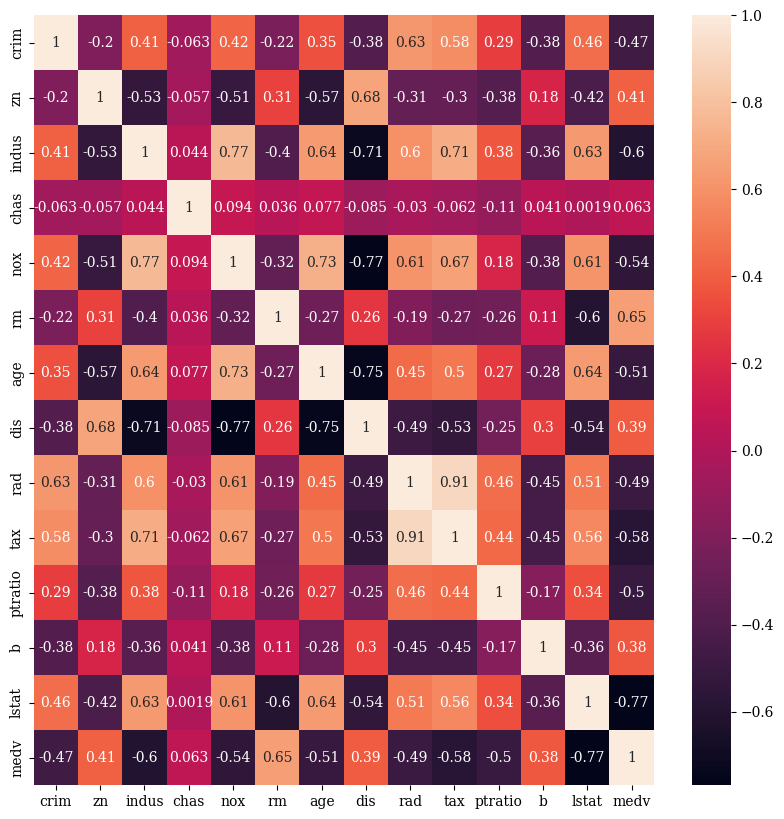

In [ ]:
from seaborn import heatmap
fig, ax = plt.subplots(figsize = (10,10))
corr = boston.corr()
heatmap(corr, annot = True)

In [ ]:
corr.medv.sort_values()

lstat     -0.769113
indus     -0.604632
tax       -0.578524
nox       -0.543413
age       -0.511453
ptratio   -0.500552
rad       -0.493590
crim      -0.466625
chas       0.063091
b          0.379022
dis        0.392548
zn         0.411480
rm         0.652239
medv       1.000000
Name: medv, dtype: float64

In [ ]:
# # really slow
# from seaborn import pairplot
# pairplot(boston)

In [ ]:
from sklearn.linear_model import LinearRegression

feature = boston['lstat']
target = boston['medv']

Feature = np.asarray(feature).reshape(-1, 1)
Target = np.asarray(target).reshape(-1, 1)

model = LinearRegression()
model.fit(Feature, Target)

LinearRegression()

RMSE:4.71
r2:0.59
Intercept:31.79
Coefficient:-0.8


Text(0, 0.5, '$QQ_{R}$')

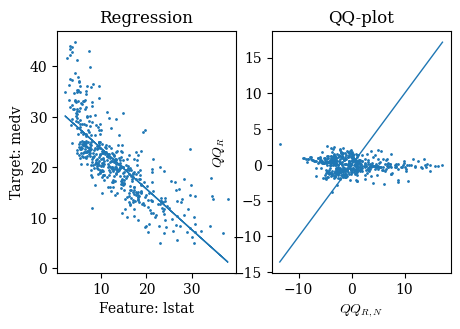

In [ ]:
# Metrics
fitted = model.predict(Feature)
residuals = Target - fitted

from sklearn.metrics import mean_squared_error, r2_score
RMSE = np.sqrt(mean_squared_error(Target, fitted))
r2 = r2_score(Target, fitted)

print('RMSE:' + str(round(RMSE,2)))
print('r2:' + str(round(r2,2)))
print('Intercept:' + str(round(model.intercept_[0],2)))
print('Coefficient:' + str(round(model.coef_[0][0],2)))

# PLOT:
fig, ax = plt.subplots(1,2)
# Correlation plot
ax[0].scatter(Feature, Target, 1)
ax[0].plot(Feature,fitted)
ax[0].set_title('Regression')
ax[0].set_xlabel('Feature: ' + feature.name)
ax[0].set_ylabel('Target: ' + target.name)

# QQ-plot
residuals_sorted = np.sort(residuals)  #sort data
quantiles = np.arange(0.0001, 0.9999, 1/(len(residuals_sorted)))  #create quantiles

from scipy import stats
ax[1].scatter(residuals_sorted, stats.norm.ppf(quantiles), 1)  #plot quantiles against sorted data
line = [min(residuals_sorted), max(residuals_sorted)]
ax[1].plot(line, line)
ax[1].set_title('QQ-plot')
ax[1].set_xlabel(r'$QQ_{R,N}$')  # residuals normalized
ax[1].set_ylabel(r'$QQ_{R}$')  # residuals

## Multiple linear regression
example on 2 feautres

In [ ]:
# from sklearn.linear_model import LinearRegression
features = boston[['lstat', 'indus']]
target = boston['medv']

model = LinearRegression()
model.fit(features, target)

# Metrics
fitted = model.predict(features)
residuals = target - fitted

# from sklearn.metrics import mean_squared_error, r2_score
RMSE = np.sqrt(mean_squared_error(target, fitted))
r2 = r2_score(target, fitted)
print('RMSE:' + str(round(RMSE,2)))
print('r2:' + str(round(r2,2)))
print('Intercept:' + str(round(model.intercept_,2)))
print('Coefficient:' + str(round(model.coef_[0],2)))
print('Coefficient:' + str(round(model.coef_[1],2)))

RMSE:4.57
r2:0.62
Intercept:32.48
Coefficient:-0.67
Coefficient:-0.21


Text(0.5, 0, 'Target: medv')

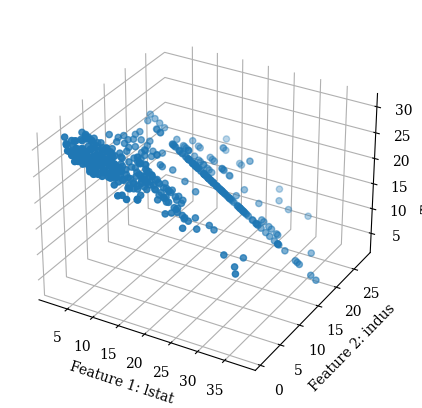

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
x = boston['lstat']
y = boston['indus']
z = model.intercept_ + model.coef_[0]*x + model.coef_[1]*y

fig = plt.figure(figsize= (5,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z)
ax.set_xlabel('Feature 1: ' + features.columns[0])
ax.set_ylabel('Feature 2: ' + features.columns[1])
ax.set_zlabel('Target: ' + target.name)

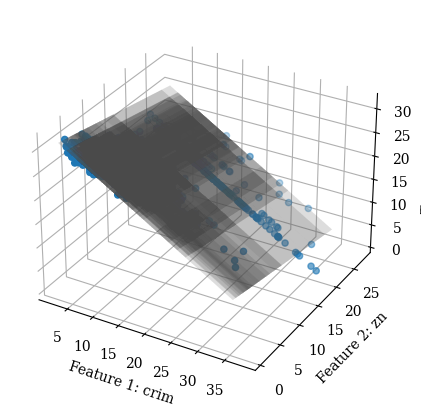

In [ ]:
X, Y = np.meshgrid(x, y)
Z = model.intercept_ + model.coef_[0]*X + model.coef_[1]*Y

# Create a figure and add a 3D subplot
fig = plt.figure(figsize= (5,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z)
ax.plot_surface(X, Y, Z.reshape(X.shape), color='gray', alpha=0.05)
ax.set_xlabel('Feature 1: ' + boston.columns[0])
ax.set_ylabel('Feature 2: ' + boston.columns[1])
ax.set_zlabel('Target: ' + boston.columns[-1])
# ax.view_init(elev=10, azim=-40)
plt.show ()

## Stepwise-regression
Possibilites:
* all-subset: too many variations in case of much predictors
* forward elimination: in case, your first predictor is inherently corresponds to bad correlation, you can't get rid of it.
* backward elimination:


(-1.0, 1.0)

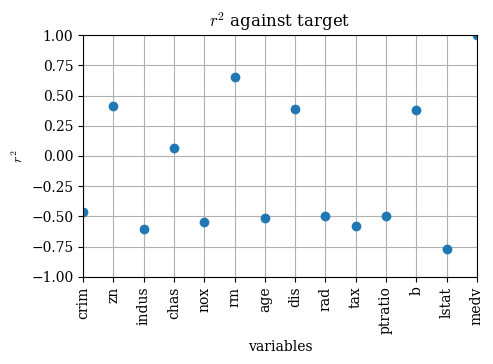

In [ ]:
plt.plot(corr['medv'],'o')
plotlabels(plt.gca(), r'$r^2$ against target','variables', r'$r^2$')
plt.xticks(rotation=90)
plt.ylim([-1,1])

In [ ]:
import statsmodels.api as sm

#  FULL model:
features = boston.columns[0:-1]
featurei = boston[features]  # contemporary container to drop columns from
target = boston['medv']

model = sm.OLS(target, sm.add_constant(featurei))  # create linear regression object
result = model.fit()  #fit model to data
r_squared = result.rsquared

# printing the summary table
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     121.6
Date:                Tue, 25 Jul 2023   Prob (F-statistic):          4.24e-141
Time:                        17:39:57   Log-Likelihood:                -1296.6
No. Observations:                 484   AIC:                             2621.
Df Residuals:                     470   BIC:                             2680.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.1250      3.941      8.658      0.0

In [ ]:
# BACKWARD elimination
for i in range(len(featurei.columns)):
    model = sm.OLS(target, sm.add_constant(featurei))  # create linear regression object
    result = model.fit()  #fit model to data
    p_values = result.pvalues
    max_p_value_index = np.argmax(p_values) # a const tag miatt eggyel visszabb kell menni a p_val hoz képest a featurei-ben

    if p_values[max_p_value_index] > 0.05:
        feature_name = featurei.columns[max_p_value_index]
        featurei = featurei.drop(feature_name, axis =1)
        print('dropped ' + feature_name + ' with p-val ' + str(round(p_values[max_p_value_index],5)))

    else:
        print('loop terminated at p-val: ' + str(p_values[max_p_value_index]))
        break

print('---')
print(result.summary())

dropped nox with p-val 0.56482
dropped rm with p-val 0.77322
dropped age with p-val 0.59995
dropped dis with p-val 0.64589
dropped rad with p-val 0.41468
dropped indus with p-val 0.73033
dropped tax with p-val 0.24137
dropped ptratio with p-val 0.23139
loop terminated at p-val: 0.033833928950455415
---
                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     159.7
Date:                Tue, 25 Jul 2023   Prob (F-statistic):           1.47e-99
Time:                        17:39:57   Log-Likelihood:                -1415.4
No. Observations:                 484   AIC:                             2843.
Df Residuals:                     478   BIC:                             2868.
Df Model:                           5                           

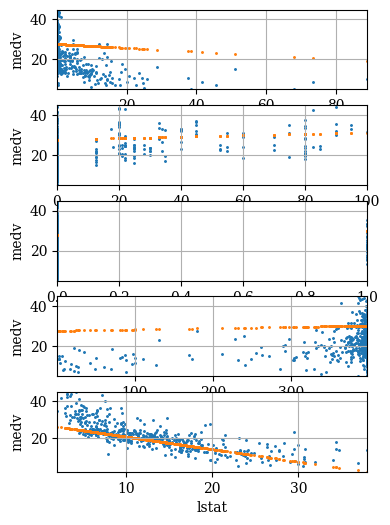

In [ ]:
if featurei.shape[1] == 0:
    print('no features left')
else:
    fig, ax = plt.subplots(len(result.params)-1, 1, figsize = (4,6))
    axs = ax.flatten()
    for i in range(1, len(result.params)):
        fitted = result.params[0] + result.params[i] * boston[featurei.columns[i-1]]
        axs[i-1].scatter(boston[featurei.columns[i-1]],boston.medv,1.2)
        axs[i-1].scatter(boston[featurei.columns[i-1]],fitted,1.2)
        plotlabels(axs[i-1],'',featurei.columns[i-1],'medv')

### Stepwise Regression

## Polynomial regression

In [ ]:
boston['crim2'] = boston['crim'] ** 2 # add a polynomial feature to the dataframe
boston['crim3'] = boston['crim'] ** 3 # add a polynomial feature to the dataframe

from sklearn.preprocessing import PolynomialFeatures

model1 = sm.formula.ols(formula='medv ~ crim', data=boston).fit()
model2 = sm.formula.ols(formula='medv ~ crim + crim2', data = boston).fit()
model3 = sm.formula.ols(formula='medv ~ crim + crim2 + crim3', data = boston).fit()

print(model1.rsquared)
print(model2.rsquared)
print(model3.rsquared)

0.2177393560845612
0.3147768811724324
0.3350284866248031


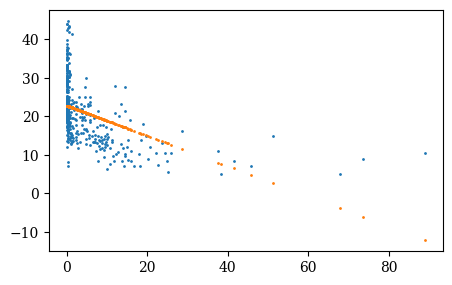

In [ ]:
plt.scatter(boston.crim, boston.medv, 1) # plot the data points
plt.scatter(boston.crim, model1.predict(boston.crim), 1) # plot the regression line

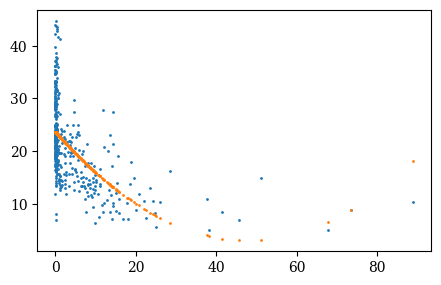

In [ ]:
plt.scatter(boston.crim, boston.medv, 1) # plot the data points
plt.scatter(boston.crim, model2.predict(boston[['crim', 'crim2']]), 1) # plot the regression line

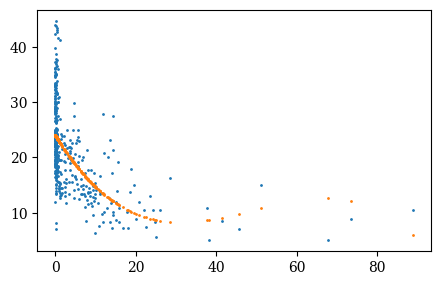

In [ ]:
plt.scatter(boston.crim, boston.medv, 1) # plot the data points
plt.scatter(boston.crim, model3.predict(boston[['crim', 'crim2', 'crim3']]), 1) # plot the regression line

Example df in 2-dim

   feature  target  feature_squared
0        1    2.50                1
1        2    3.51                4
2        3    4.45                9
3        4    5.52               16


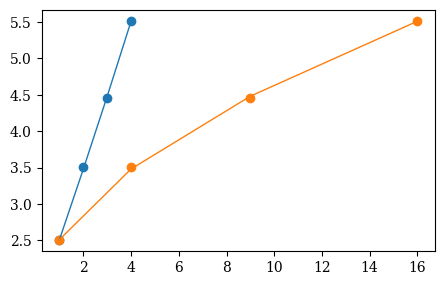

In [ ]:
#  import statsmodels.api as sm
df = pd.DataFrame({'feature': [1, 2, 3, 4], 'target': [2.5, 3.51, 4.45, 5.52]}) # create a dataframe with one feature column and one target column
df['feature_squared'] = df['feature'] ** 2 # add a polynomial feature to the dataframe
print(df)

# fit the polynomial regression model
# model = sm.formula.ols(formula='target ~ feature', data=df).fit()
# model = sm.formula.ols(formula='target ~ feature_squared', data=df).fit()
model = sm.formula.ols(formula='target ~ feature + feature_squared', data=df).fit()

plt.scatter(df['feature'], df['target']) # plot the data points
plt.plot(df['feature'], model.predict(df[['feature', 'feature_squared']])) # plot the regression line

plt.scatter(df['feature_squared'], df['target']) # plot the data points
plt.plot(df['feature_squared'], model.predict(df[['feature', 'feature_squared']])) # plot the regression line

plt.show()

The degree of the polynomial regression model in this example is 2. This is because we added a squared feature to the dataframe by squaring the feature column. The degree of the polynomial regression model is equal to the highest power of the predictor variable in the model. In this case, the highest power of the predictor variable is 2.

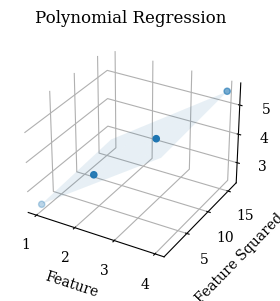

In [ ]:
# create a 3D scatter plot of the data points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['feature'], df['feature_squared'], df['target'])

# create a meshgrid of feature values
x_surf = df['feature']
y_surf = df['feature_squared']
X, Y = np.meshgrid(x_surf, y_surf)

# calculate predicted target values for each combination of feature values
Z = model.predict(pd.DataFrame({'feature': X.ravel(), 'feature_squared': Y.ravel()})).values.reshape(X.shape)

# plot the regression surface
ax.plot_surface(X, Y, Z, alpha = 0.1)

# set axis labels and title
ax.set_xlabel('Feature')
ax.set_ylabel('Feature Squared')
ax.set_zlabel('Target')
plt.title('Polynomial Regression')

# show the plot
plt.show()

In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     1250.
Date:                Tue, 25 Jul 2023   Prob (F-statistic):             0.0200
Time:                        17:40:01   Log-Likelihood:                 9.5261
No. Observations:                   4   AIC:                            -13.05
Df Residuals:                       1   BIC:                            -14.89
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.5700      0.124     

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


drop the crim squared column to get back the original dataset

In [ ]:
boston = boston.iloc[:, :-2]
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [ ]:
import statsmodels.api as sm

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(boston.iloc[:, :-1])
y = boston.iloc[:, -1]

X_poly = sm.add_constant(X_poly)
model = sm.OLS(y, X_poly).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     44.87
Date:                Tue, 25 Jul 2023   Prob (F-statistic):          1.22e-162
Time:                        17:40:02   Log-Likelihood:                -1029.4
No. Observations:                 484   AIC:                             2267.
Df Residuals:                     380   BIC:                             2702.
Df Model:                         103                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -20.5569     80.165     -0.256      0.7